# Gold Recovered From Gold Ore

### Content

1. [Introduction](#intro)
2. [General information](#general)
3. [MAE](#mae)
4. [Preparing data](#prepare)
5. [Analyze the data](#analyze)
6. [Models](#models)
7. [Conclusion](#conclusion)

### Introduction<a href='intro'></a>


**Project Description**
It's time to deal with a real data science problem from the gold mining sector. This project is provided by Zyfra.
The data is stored in three files:
- gold_recovery_full.csv
- gold_recovery_test.csv
- gold_recovery_train.csv

Data is indexed with the date and time of acquisition. Parameters that are next to each other in terms of time are often similar.
Some parameters are not available because they were measured and/or calculated much later. That's why, some features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.
The source dataset contains the training and test sets with all the features.

We need to prepare a prototype of a machine learning model for a company. The company develops efficiency solutions for heavy industry.<br>
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.<br>
The model will help to optimize the production and eliminate unprofitable parameters.<br>

*Technological process*

How is gold extracted from ore? Let's look into the process stages.
Mined ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification.

Let's break down the process:
1. Flotation
Gold ore mixture is fed into the float banks to obtain rougher Au concentrate and rougher tails (product residues with a low concentration of valuable metals).
The stability of this process is affected by the volatile and non-optimal physicochemical state of the flotation pulp (a mixture of solid particles and liquid).
2. Purification
The rougher concentrate undergoes two stages of purification. After purification, we have the final concentrate and new tails.


*Libraries*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from  sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


## General Information<a href='general'></a>

In [2]:
try:
    gold_full_set = pd.read_csv('gold_recovery_full.csv')
    gold_test_set = pd.read_csv('gold_recovery_test.csv')
    gold_train_set = pd.read_csv('gold_recovery_train.csv')
except:
    gold_full_set = pd.read_csv('/datasets/gold_recovery_full.csv')
    gold_test_set = pd.read_csv('/datasets/gold_recovery_test.csv')
    gold_train_set = pd.read_csv('/datasets/gold_recovery_train.csv')

*Full set*

In [3]:
gold_full_set.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
15834,2017-11-04 17:59:59,5.459851,9.543188,9.029214,46.328798,65.069198,12.460851,3.911590,10.989990,4.313225,...,2.002036e+01,-501.040822,1.796570e+01,-499.836768,13.986214,-500.649440,10.021810,-500.050923,14.016023,-501.244950
8493,2017-01-02 20:59:59,4.390672,6.429889,13.246725,48.899677,69.021719,9.794339,1.532395,10.844389,2.257631,...,1.699754e+01,-500.915032,1.496549e+01,-500.652707,17.570949,-500.848611,8.019918,-500.739841,19.986615,-600.206311
1801,2016-03-30 01:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,4.595555e-17,-799.544905,2.556404e-20,-517.203291,-0.175379,-794.967788,0.645102,-799.957587,0.251170,-799.770962
5967,2016-09-19 14:59:59,6.645201,8.903178,16.320668,44.155694,69.094904,10.899742,2.821441,8.001114,3.750099,...,1.203040e+01,-554.076404,1.008237e+01,-500.081978,10.099230,-499.300589,5.001915,-500.873727,19.960188,-501.047049
4865,2016-08-04 16:59:59,4.639526,9.790168,7.751909,45.949217,61.812006,8.915172,2.994690,3.573896,3.435919,...,2.004190e+01,-399.447939,9.978983e+00,-399.207000,9.973792,-399.452378,5.082679,-400.138640,22.955483,-499.008811
15569,2017-10-24 16:59:59,5.609661,11.019347,9.601263,44.631345,74.878351,8.800503,3.945609,12.055330,2.970690,...,2.100082e+01,-499.538527,1.913617e+01,-399.953908,14.977675,-499.238663,10.951185,-499.814872,15.996679,-499.594381
19927,2018-04-24 06:59:59,4.747041,9.239875,9.449915,47.248373,74.983220,12.753184,1.956069,8.572293,2.312018,...,2.701102e+01,-501.579020,2.009110e+01,-501.286528,19.992819,-501.028042,14.995248,-499.746455,18.015994,-500.214368
15772,2017-11-02 03:59:59,4.979658,11.150949,8.968626,44.898156,77.951177,8.329301,3.108222,13.356993,1.957599,...,1.797920e+01,-500.436094,1.602676e+01,-499.860903,14.986053,-499.712595,10.957719,-499.843685,15.961531,-501.479326
14672,2017-09-17 07:59:59,5.395153,10.702148,7.088619,44.050791,72.732586,7.126304,2.409884,11.928124,2.182325,...,1.196906e+01,-499.927979,8.923628e+00,-400.217448,8.981753,-500.255117,6.923597,-500.334311,9.987565,-499.895942
17450,2018-01-11 01:59:59,8.436320,10.155265,13.300364,40.053937,NaN,13.888547,3.865847,11.694248,4.649200,...,2.002406e+01,-585.915839,1.496532e+01,-505.524657,10.942284,-498.229751,9.019439,-499.834574,10.992617,-498.346271


In [4]:
gold_full_set.shape

(22716, 87)

In [5]:
gold_full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [6]:
gold_full_set.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [7]:
gold_full_set.duplicated().sum()


0

*Train set*

In [8]:
gold_train_set.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16409,2018-07-30 16:59:59,4.804545,8.615086,10.745209,44.307222,74.306962,13.953567,2.200656,10.865229,2.471642,...,22.057360,-500.624603,16.832586,-500.255953,16.960490,-499.560350,13.015694,-499.860756,17.986086,-499.656150
8947,2017-05-23 18:59:59,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,24.992734,-502.019496,23.070562,-504.462304,26.015410,-502.100084,24.034541,-500.170926,17.992989,-496.254692
15456,2018-06-20 23:59:59,3.882586,11.443239,6.633092,45.937363,71.665594,8.754127,2.547078,9.963417,1.799152,...,27.038556,-500.113720,20.102176,-499.032380,17.975577,-500.297274,13.981345,-499.979643,14.007143,-500.526327
10629,2017-08-01 20:59:59,3.252692,8.096625,6.965289,43.858554,69.085134,7.252462,2.592285,10.394494,2.129772,...,13.032256,-498.652215,9.914045,-399.808428,11.091005,-502.792742,8.996286,-500.303323,12.005013,-500.037410
9769,2017-06-27 00:59:59,6.177414,11.595620,9.969909,40.933166,66.944977,7.340154,2.566686,10.394474,2.415733,...,18.013904,-499.732110,13.035501,-378.719066,17.963823,-500.129558,13.029492,-499.784080,14.979331,-499.850845
16352,2018-07-28 07:59:59,3.553971,7.812532,9.418497,47.530332,78.150993,13.456955,2.727368,9.519773,2.728305,...,19.970385,-500.331099,15.003391,-500.061130,14.981737,-499.738051,11.022752,-500.084391,17.992011,-501.565104
12502,2018-02-17 21:59:59,5.460105,9.034189,8.973786,46.170958,81.566976,9.285332,0.767560,14.064335,1.644728,...,19.970510,-499.868136,14.936954,-499.739103,10.919469,-499.288749,8.981148,-499.783310,11.009947,-500.947131
3188,2016-05-26 19:59:59,3.598094,11.093705,8.856945,45.560882,60.434771,7.439423,2.158888,12.673557,2.895803,...,9.972490,-500.272789,8.125284,-501.203150,7.950162,-498.510821,5.987199,-499.916271,17.977114,-499.735945
14092,2018-04-25 03:59:59,4.319636,9.202034,8.188712,48.944469,69.725314,10.999098,2.089327,8.918271,2.352161,...,27.007508,-501.229506,19.905699,-499.926685,19.996530,-500.469289,14.983381,-500.052520,18.022804,-500.349709
1417,2016-03-14 01:00:00,5.196796,9.541452,6.578932,44.588835,67.714756,10.486641,1.485766,17.308027,2.965548,...,12.042777,-502.117734,11.911511,-500.376882,12.056904,-501.513709,10.014407,-499.999349,19.980076,-500.820918


In [9]:
gold_train_set.shape

(16860, 87)

In [10]:
gold_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [11]:
gold_train_set.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [12]:
gold_train_set.duplicated().sum()


0

*Test set*

In [13]:
gold_test_set.sample(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
390,2016-09-17 06:59:59,152.131208,7.552544,8.100000,1.190593,1551.024401,-499.694714,1549.416734,-499.618603,1550.522136,...,8.017907,-500.096443,5.005368,-499.731230,7.979653,-500.452627,2.914693,-499.574657,20.036248,-500.654850
1688,2016-11-10 08:59:59,150.749831,5.062506,6.710000,0.894342,1591.649305,-500.383466,1601.231250,-499.981375,1600.778438,...,16.011752,-501.064303,13.996553,-501.149501,16.083205,-499.560516,14.010881,-499.731958,22.005888,-500.844564
2994,2017-09-03 18:59:59,56.155555,4.002542,5.900000,1.000335,1601.009877,-500.038542,1599.440227,-500.521942,1596.831470,...,12.005772,-500.273601,9.102298,-399.729361,14.053772,-499.630427,9.836620,-500.183952,14.989429,-499.712549
2519,2016-12-14 23:59:59,186.149623,11.507249,8.433334,1.123333,1595.849829,-500.235449,1603.929967,-499.346834,1602.333262,...,17.023073,-500.417775,15.083021,-499.947027,17.928820,-499.452709,11.951640,-499.804796,21.005026,-500.957594
5069,2017-11-29 05:59:59,193.329320,9.808228,6.590000,2.097600,1496.359137,-499.894072,1497.902683,-505.825143,1496.183970,...,17.025547,-506.372322,14.986762,-500.308496,11.030444,-499.369649,8.975590,-500.436997,11.991249,-495.307786
2180,2016-11-30 20:59:59,248.369230,7.054064,7.100000,1.497271,1500.175590,-499.841557,1499.173789,-500.912564,1497.376404,...,18.031487,-499.978869,15.910721,-500.465316,16.954086,-499.758960,12.047088,-500.012620,21.991049,-499.835284
2464,2016-12-12 16:59:59,143.548963,6.936106,9.580000,1.032731,1500.872990,-500.090423,1497.905094,-501.087285,1497.419924,...,16.957702,-500.341545,14.917130,-496.915421,14.956072,-499.492344,12.026465,-498.936193,20.996145,-498.255204
1916,2016-11-19 20:59:59,205.957268,7.004790,7.530000,1.115872,1600.236641,-499.825490,1601.862382,-499.721622,1604.539519,...,17.567285,-501.268040,15.578915,-397.790026,15.876965,-497.992961,9.465561,-499.923746,5.053636,-809.205214
1174,2016-10-19 22:59:59,160.162783,7.991740,7.030000,0.996509,1629.145835,-500.599360,1702.743636,-500.213211,1698.701916,...,20.033718,-499.637900,16.975815,-500.271987,18.693072,-500.009317,14.015432,-500.191063,25.012233,-499.984205
4805,2017-11-18 05:59:59,231.725013,9.976970,6.570000,3.909500,1602.220534,-500.210551,1599.832283,-499.564644,1564.229657,...,17.019511,-500.271934,14.982626,-500.499312,10.912511,-500.256027,9.001767,-500.393866,15.987366,-501.051796


In [14]:
gold_test_set.shape

(5856, 53)

In [15]:
gold_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [16]:
gold_test_set.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [17]:
gold_test_set.duplicated().sum()


0

#### Intermediate conclusion

We have three datasets.

In each dataset we have missing data. It is not a surprise as there is an information about it in technical requirements.

No duplicates

## MAE<a href='mae'></a>

*MAE flotation*

In [18]:
mae_flotation = gold_train_set.loc[:, ['rougher.output.concentrate_au',
                          'rougher.input.feed_au',
                          'rougher.output.tail_au',
                          'rougher.output.recovery']].dropna(subset = ['rougher.output.recovery'])

*MAE purification*

In [19]:
mae_purification = gold_train_set.loc[:, ['final.output.concentrate_au',
                          'rougher.input.feed_au',
                          'final.output.tail_au',
                          'final.output.recovery']].dropna(
    subset = ['final.output.recovery'])


In [20]:
mae_flotation.fillna(method='ffill', inplace=True)
mae_purification.fillna(method='ffill', inplace=True)

In [21]:
def recovery_count(C, F, T):
    if F != 0:
        return ((C*(F-T) / (F*(C-T))))*100
    return 0


In [22]:
def recovery_flotation(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    return recovery_count(C, F, T)


In [23]:
def recovery_purification(row):
    C = row['final.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['final.output.tail_au']
    return recovery_count(C, F, T)


In [24]:
mae_flotation['rougher.output.recovery_new'] = mae_flotation.apply(recovery_flotation, axis=1)


In [25]:
mean_absolute_error(mae_flotation['rougher.output.recovery'], mae_flotation['rougher.output.recovery_new'])

9.444891926100695e-15

In [26]:
mae_purification['final.output.recovery_new'] = mae_purification.apply(recovery_purification, axis=1)

In [27]:
mean_absolute_error(mae_purification['final.output.recovery'], mae_purification['final.output.recovery_new'])

8.158251945945868e-15

In [28]:
gold_train_set.drop(gold_test_set.columns, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.output.concentrate_sol      

### Conclusion

MAE is very small which means that data of recovery is correct.

In test dataset we don't have information like calculations. According to the requirements list this information is accepted only after purification (if I understood right an explanation)

## Preparing data<a href='prepare'></a>

In [29]:
gold_train_set = gold_train_set.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

In [30]:
gold_train_set = gold_train_set.fillna(method='ffill')
gold_test_set = gold_test_set.fillna(method='ffill')

#### Intermediate conclusion

1. Deleted missing data in target
2. Fill missing data with previous data in features


In [31]:
def date(data):
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    data['date'] = data['date'].dt.round('1H')

In [32]:
date(gold_test_set)
date(gold_train_set)
date(gold_full_set)

#### Intermediate conclusion
Changed date format and round it by 1 hour

In [33]:
add_columns = ['rougher.output.recovery', 'date', 'final.output.recovery']

In [34]:
gold_test_set = gold_test_set.merge(gold_full_set[add_columns], on='date').dropna(subset=add_columns)

In [35]:
gold_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5290 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
ro

#### Intermediate conclusion
Added to test set targets from full set

### Conclusion

1. Deleted missing data in target
2. Fill missing data with previous data in features
3. Changed date format and round it by 1 hour
4. Added to test set targets from full set

Seems data is ready to analyze.

## Analyze the data<a href='analyze'></a>

*Concentration of Au*

Text(0.5, 1.0, 'Au concentration changing during different stages')

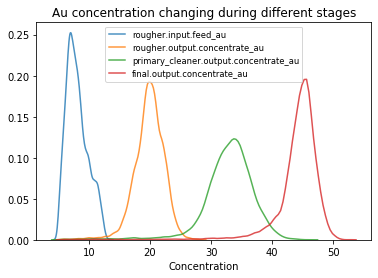

In [36]:
au1 = sns.kdeplot(gold_train_set['rougher.input.feed_au'], label='rougher.input.feed_au', shade = False, clip=(5,55), alpha = 0.8);

au2 = sns.kdeplot(gold_train_set['rougher.output.concentrate_au'], label='rougher.output.concentrate_au', shade = False, clip=(5,55), alpha = 0.8);

au3 = sns.kdeplot(gold_train_set['primary_cleaner.output.concentrate_au'], label='primary_cleaner.output.concentrate_au', shade = False, clip=(5,55), alpha = 0.8);

au4 = sns.kdeplot(gold_train_set['final.output.concentrate_au'], label='final.output.concentrate_au',shade = False, clip=(5,55), alpha = 0.8);

plt.legend(fontsize='small')
plt.xlabel('Concentration')
plt.title('Au concentration changing during different stages')

#### Intermediate conclusion
It seems that on each next stage concentration of Au is growing.

*Concentration of Ag*

Text(0.5, 1.0, 'Ag concentration changing during different stages')

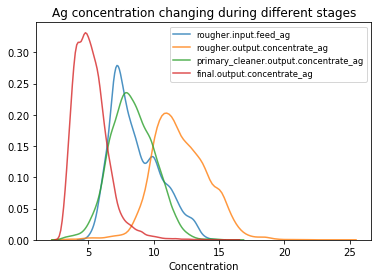

In [37]:
ag1 = sns.kdeplot(gold_train_set['rougher.input.feed_ag'], label='rougher.input.feed_ag', shade = False, clip=(5,55), alpha = 0.8);

ag2 = sns.kdeplot(gold_train_set['rougher.output.concentrate_ag'], label='rougher.output.concentrate_ag', shade = False, clip=(3,25), alpha = 0.8);

ag3 = sns.kdeplot(gold_train_set['primary_cleaner.output.concentrate_ag'], label='primary_cleaner.output.concentrate_ag', shade = False, clip=(3,25), alpha = 0.8);

ag4 = sns.kdeplot(gold_train_set['final.output.concentrate_ag'], label='final.output.concentrate_ag',shade = False, clip=(3,25), alpha = 0.8);

plt.legend(fontsize='small')
plt.xlabel('Concentration')
plt.title('Ag concentration changing during different stages')

#### Intermediate conclusion
It seems that the highest concentration of Ag is on flotation stage and then it's decreasing.


*Concentration of Pb*

Text(0.5, 1.0, 'Pb concentration changing during different stages')

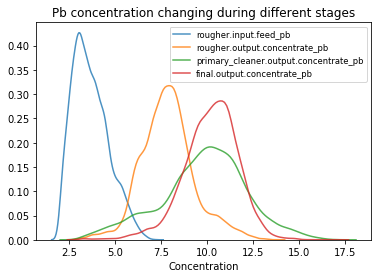

In [38]:
pb1 = sns.kdeplot(gold_train_set['rougher.input.feed_pb'], label='rougher.input.feed_pb', shade = False, clip=(2,15), alpha = 0.8);

pb2 = sns.kdeplot(gold_train_set['rougher.output.concentrate_pb'], label='rougher.output.concentrate_pb', shade = False, clip=(3,25), alpha = 0.8);

pb3 = sns.kdeplot(gold_train_set['primary_cleaner.output.concentrate_pb'], label='primary_cleaner.output.concentrate_pb', shade = False, clip=(3,25), alpha = 0.8);

pb4 = sns.kdeplot(gold_train_set['final.output.concentrate_pb'], label='final.output.concentrate_pb',shade = False, clip=(3,25), alpha = 0.8);

plt.legend(fontsize='small')
plt.xlabel('Concentration')
plt.title('Pb concentration changing during different stages')

#### Intermediate conclusion
It seems that on each next stage concentration of Pb is growing.


*Comparing distribution of rounds' size  (test and train sets)*

In [39]:
def confidence_interval(train, test):
    fig, ax = plt.subplots()

    plt.xlim([0,400])
    sx = sns.boxplot(x='rougher.input.feed_size',data = train, orient = 'h', color="gray")
    plt.title('Train Set')
    plt.show()

    plt.xlim([0,400])
    sns.boxplot(x='rougher.input.feed_size',data = test, orient = 'h')
    plt.title('Test Set')
    plt.show()

    sns.distplot(train['rougher.input.feed_size'], kde=True, hist_kws={"alpha": 0.2, "color": "y"})
    sns.distplot(train['rougher.input.feed_size'], kde=True, hist_kws={"alpha": 0.2, "color": "g"})
    plt.title('Compare Test and Train Sets')
    plt.show()

    for frame in [train, test]:
        print('Average is:', frame['rougher.input.feed_size'].mean())
        q_025 = frame['rougher.input.feed_size'].quantile(0.025)
        q_975 = frame['rougher.input.feed_size'].quantile(0.975)
        print('Confidence Interval (95%): ({:.2f}:{:.2f})'.format(q_025, q_975))
    print()

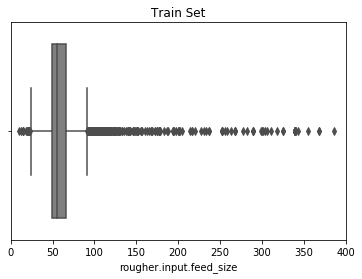

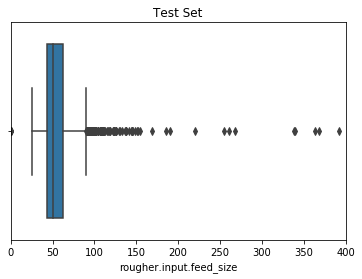

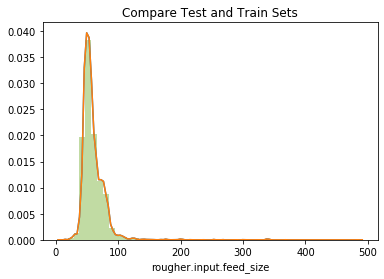

Average is: 60.23985599255732
Confidence Interval (95%): (40.08:97.49)
Average is: 55.95275402889513
Confidence Interval (95%): (39.72:94.19)



In [40]:
confidence_interval(gold_train_set, gold_test_set)

#### Intermediate conclusion

It seems that there is no big difference in distribution of rounds. To be sure if there is a difference or not it is better to consult with specialist in this field.

*Concentration of all elements during processing*

In [41]:
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_'
]


In [42]:
metals = ['ag', 'au', 'pb', 'sol']

In [43]:
def concentration(row):
    for stage in stages:
        conc = 0
        for metal in metals:
            title = stage + metal
            conc += row[title]
        title_sum = stage + 'sum'
        row[title_sum] = conc
    return row

In [44]:
gold_full_set = gold_full_set.apply(concentration, axis=1)

In [45]:
def stage_plot(data):
    data_plot = data.loc[:, data.columns.str.contains('sum')]
    sns.violinplot(data = data_plot, orient = 'h')
    plt.title('Concentration changing during processing', fontsize=15)
    plt.show()

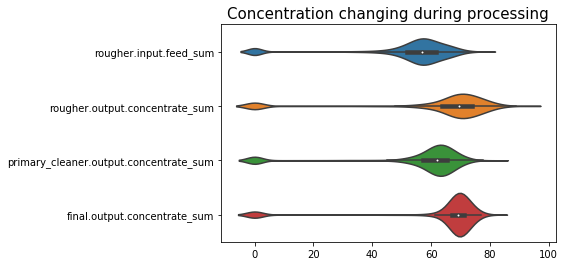

In [46]:
stage_plot(gold_full_set)

#### Intermediate conclusion

We have a concentration in section 0-1 which is seems weird. Let's delete it.

In [47]:
fixed_full_set = gold_full_set[(
    gold_full_set['rougher.input.feed_sum'] > 1) & (
    gold_full_set['rougher.output.concentrate_sum'] > 1) & (
    gold_full_set['primary_cleaner.output.concentrate_sum'] > 1) & (
    gold_full_set['final.output.concentrate_sum'] > 1 )]

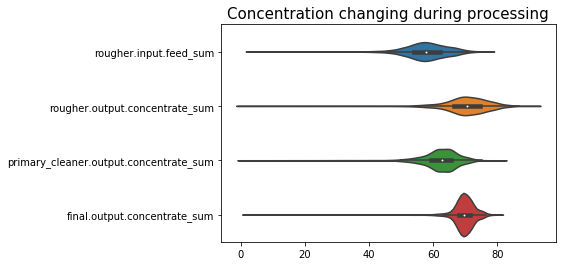

In [48]:
stage_plot(fixed_full_set)

In [49]:
def drop_outbreak(data):
    data_plot = gold_full_set.drop(fixed_full_set.index)
    fixed_data = data.drop(data_plot.index, errors = 'ignore')
    return fixed_data

In [50]:
fixed_train_set = drop_outbreak(gold_train_set)

In [51]:
fixed_test_set = drop_outbreak(gold_test_set)

### Conclusion
1. It seems that on each next stage concentration of Au & Pb is growing.
2. It seems that the highest concentration of Ag is on flotation stage and then it's decreasing.
3. It seems that there is no big difference in distribution of rounds. To be sure if there is a difference or not it is better to consult with specialist in this field.
4. We had a concentration in section 0-1.

### Models<a href='models'></a>

*sMAPE*


In [54]:
def sMAPE(true, pred):
    pred = pd.Series(pred, true.index)
    x = (abs(true-pred) / ((abs(true) + abs(pred))/2)).sum()/len(true)
    return x*100

In [55]:

def final_smape(true, pred):
    return 0.25*sMAPE(
        true['rougher.output.recovery'], pred[:,0]) + 0.75*sMAPE(
        true['final.output.recovery'], pred[:,1])

*Deleting columns from train set*

In [56]:
fixed_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12486 entries, 0 to 16856
Data columns (total 87 columns):
date                                                  12486 non-null datetime64[ns]
final.output.concentrate_ag                           12486 non-null float64
final.output.concentrate_pb                           12486 non-null float64
final.output.concentrate_sol                          12486 non-null float64
final.output.concentrate_au                           12486 non-null float64
final.output.recovery                                 12486 non-null float64
final.output.tail_ag                                  12486 non-null float64
final.output.tail_pb                                  12486 non-null float64
final.output.tail_sol                                 12486 non-null float64
final.output.tail_au                                  12486 non-null float64
primary_cleaner.input.sulfate                         12486 non-null float64
primary_cleaner.input.depressant     

In [57]:
fixed_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4279 entries, 0 to 5855
Data columns (total 55 columns):
date                                          4279 non-null datetime64[ns]
primary_cleaner.input.sulfate                 4279 non-null float64
primary_cleaner.input.depressant              4279 non-null float64
primary_cleaner.input.feed_size               4279 non-null float64
primary_cleaner.input.xanthate                4279 non-null float64
primary_cleaner.state.floatbank8_a_air        4279 non-null float64
primary_cleaner.state.floatbank8_a_level      4279 non-null float64
primary_cleaner.state.floatbank8_b_air        4279 non-null float64
primary_cleaner.state.floatbank8_b_level      4279 non-null float64
primary_cleaner.state.floatbank8_c_air        4279 non-null float64
primary_cleaner.state.floatbank8_c_level      4279 non-null float64
primary_cleaner.state.floatbank8_d_air        4279 non-null float64
primary_cleaner.state.floatbank8_d_level      4279 non-null float64
ro

In [58]:
columns_to_drop = fixed_train_set.drop(fixed_test_set.columns, axis = 1).columns

In [59]:
train_set_new =  fixed_train_set.drop(columns_to_drop, axis =1)

In [60]:
train_set_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12486 entries, 0 to 16856
Data columns (total 55 columns):
date                                          12486 non-null datetime64[ns]
final.output.recovery                         12486 non-null float64
primary_cleaner.input.sulfate                 12486 non-null float64
primary_cleaner.input.depressant              12486 non-null float64
primary_cleaner.input.feed_size               12486 non-null float64
primary_cleaner.input.xanthate                12486 non-null float64
primary_cleaner.state.floatbank8_a_air        12486 non-null float64
primary_cleaner.state.floatbank8_a_level      12486 non-null float64
primary_cleaner.state.floatbank8_b_air        12486 non-null float64
primary_cleaner.state.floatbank8_b_level      12486 non-null float64
primary_cleaner.state.floatbank8_c_air        12486 non-null float64
primary_cleaner.state.floatbank8_c_level      12486 non-null float64
primary_cleaner.state.floatbank8_d_air        12486 non-

In [61]:
train_set_new.drop('date', axis=1, inplace=True)

In [62]:
fixed_test_set.drop('date', axis=1, inplace=True)

*Preparing data for building models*

In [63]:
def split_data(data):
    target = data[['rougher.output.recovery', 'final.output.recovery']]
    features = data.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
    return features, target

In [64]:
features_train, target_train = split_data(train_set_new)

In [65]:
features_test, target_test = split_data(fixed_test_set)

In [66]:
scaler = StandardScaler()
scaler.fit(features_train[features_train.columns])

features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
features_test[features_test.columns] = scaler.transform(features_test[features_test.columns])


In [67]:
smape_scorer = make_scorer(final_smape, greater_is_better = False)

*Cross validation*

In [68]:
def cr_val_sc(model, features, target):

    score = cross_val_score(
        model,
        features,
        target,
        cv=5,
        scoring = smape_scorer,
        error_score='raise')

    final_score = score.mean()
    return final_score

*Models*

In [69]:
model_linear = LinearRegression()

model_forest = RandomForestRegressor(
    random_state = 12345,
    n_jobs=-1)

model_tree = DecisionTreeRegressor(
    random_state = 12345)


In [70]:
cr_val_sc(model_linear, features_train, target_train)

-11.709920058625967

In [71]:

forest = {
    'n_estimators': [50,300,50],
    'max_depth':[5,15],
    'max_features' : [1,20, 2]
}

tree = {
    'max_depth':[1,20]
}

In [72]:
CV_tree = GridSearchCV(
    model_tree,
    param_grid=tree,
    scoring=smape_scorer,
    cv=5)

CV_tree.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(final_smape, greater_is_better=False),
             verbose=0)

In [73]:
print('The best of sMAPE:', CV_tree.best_score_)
print('With params', CV_tree.best_params_)

The best of sMAPE: -10.965990205097505
With params {'max_depth': 1}


In [74]:
CV_forest = GridSearchCV(
    model_forest,
    param_grid=forest,
    scoring=smape_scorer,
    cv=5)

CV_forest.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=None,
            

In [75]:
print('The best of sMAPE:', CV_forest.best_score_)
print('With params', CV_forest.best_params_)

The best of sMAPE: -9.36860081269276
With params {'max_depth': 5, 'max_features': 20, 'n_estimators': 300}


### Conclusion

According to sMAPE the best model is RandomForestRegressor.


In [76]:
model = RandomForestRegressor(
    random_state = 12345,
    n_estimators=300,
    max_depth=5,
    max_features=20,
    n_jobs=-1)

model.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=20, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)

In [77]:
predict = model.predict(features_test)

In [78]:
print('The best model has sMAPE:', final_smape(target_test, predict))


The best model has sMAPE: 8.698748288719123


## Conclusion
1. We have three datasets.
2. Count MAE which.
3. On each next stage concentration of Au & Pb is growing.
4. The highest concentration of Ag is on flotation stage and then it's decreasing.
5. There is no big difference in distribution of rounds. To be sure if there is a difference or not it is better to consult with specialist in this field.
6. We had a concentration in section 0-1.
7. Were built models: RandomForestRegressor, DecisionTreeRegressor, LinearRegression
8. Used cross-validation
9. According to sMAPE the best model is RandomForestRegressor.

